In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

response = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
file = ZipFile(BytesIO(response.read())).open('bank-full.csv')
df = pd.read_csv(file, delimiter=';')
dfn = pd.get_dummies(df, drop_first=True)

## Funções de advanced analytics

In [2]:
def feature_importances(X, y):    
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.datasets import make_classification
    from sklearn.ensemble import ExtraTreesClassifier
    
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Feature importances")
    plt.barh(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.yticks(range(X.shape[1]), X.columns[indices])
    plt.ylim([-1, X.shape[1]])
    plt.show()

# 1-Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
R. Analisando o agrupamento das colunas 'job' (profissão) e 'loan' (empréstimo pessoal), o primeiro gráfico afirma que a profissão que tem mais tendência a fazer esse empréstimo é a 'blue-collar'. Agora analisando o agrupamento entre a coluna 'job' e 'housing' (empréstimo imobiliário), o segundo gráfico também afirma que a profissão para esse empréstimo é também a 'blue-collar'. Analisando os dois gráficos e levando em consideração a quantidade de 'yes', pode-se afirmar que a profissão que tem mais tendência a fazer um empréstimo é a 'blue-collar' do tipo imobiliário.

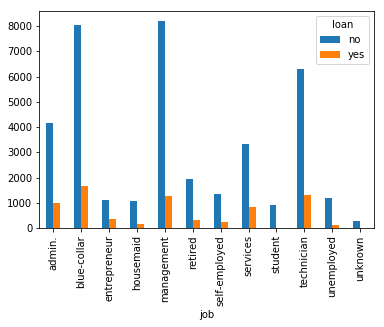

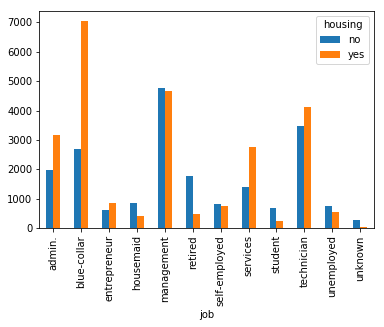

In [3]:
#Realizando agrupamentos entre colunas.
ax = df[['job', 'loan']].groupby(['job', 'loan']).size().unstack().plot.bar()
ax = df[['job', 'housing']].groupby(['job', 'housing']).size().unstack().plot.bar()

# 2-Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
R. Analisando a relação entre os números de contatos das campanhas anteriores e atuais, percebe-se que quanto maior é a quantidade de ligações, menor é o sucesso da campanha. Avaliando a importância da característica 'cmpaign' dentre as demais para o sucesso da campanha, essa característica é apenas a quinta mais relevante para o modelo, tendo a 'duration' commo característica de maior relevância para o sucesso da campanha.

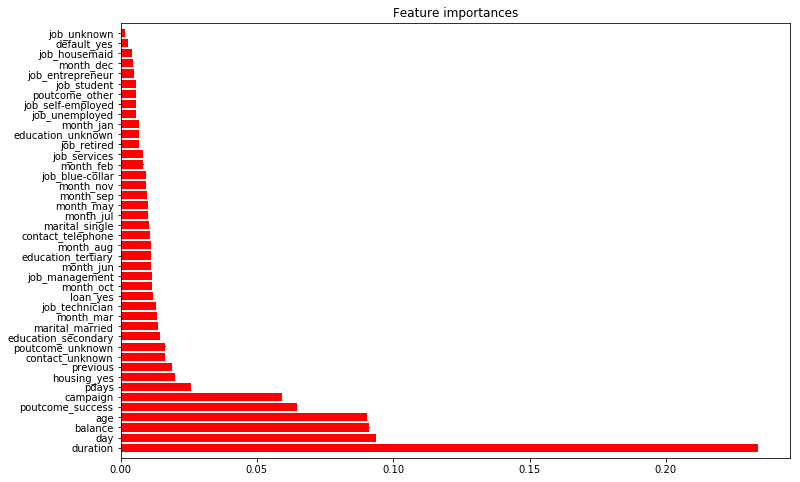

In [4]:
feature_importances(dfn.drop('y_yes', axis = 1), dfn['y_yes'])

In [5]:
binn = 5
df['binned'] = df['campaign'].apply(lambda x : (x // binn) * binn)
aux = df[['binned', 'y']].groupby(['binned', 'y']).size().unstack()
aux = aux['yes'] / aux['no'] * 100
aux

binned
0     14.320807
5      7.651410
10     5.472637
15     3.809524
20     2.142857
25     1.315789
30     2.564103
35          NaN
40          NaN
45          NaN
50          NaN
55          NaN
60          NaN
dtype: float64

# 3-Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
R. Fazendo uma análise estatística com base na mediana, o número médio de ligações de ligações seria de 2 e o número máximo seria de 14 para otimizar a adesão. Dado o pareto 95:5 o grupo que representa 14 ligações (grupo 10) tem um ganho de mais de 5% do total de esforço gasto com ligações, esse foi o critério de seleção adotado.  

In [6]:
df[df['y'] == 'yes']['campaign'].median()

2.0

In [7]:
binn = 5
df['binned'] = df['campaign'].apply(lambda x : (x // binn) * binn)
aux = df[['binned', 'y']].groupby(['binned', 'y']).size().unstack()
aux = aux['yes'] / aux['no'] * 100
aux

binned
0     14.320807
5      7.651410
10     5.472637
15     3.809524
20     2.142857
25     1.315789
30     2.564103
35          NaN
40          NaN
45          NaN
50          NaN
55          NaN
60          NaN
dtype: float64

# 4-O resultado da campanha anterior tem relevância na campanha atual?
R. Analisando a correlação com a variáveis que representam a campanha anterior com as que representam a campanha atual, percebe-se que não existe uma correlação e utilizando uma RandomForest para a análise da importância das características do modelo, através da entropia das características, pode-se avaliar que a característica 'previous' se encontra na sétima posição das variáveis com maior importância para o modelo.

,campaign,previous
campaign,1.000000,-0.052262
previous,-0.052262,1.000000


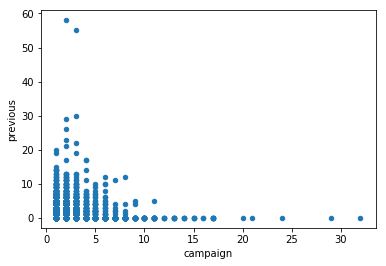

In [8]:
dfaux = df[(df['previous'] < 64) & (df['y'] == 'yes')]
dfaux[['campaign', 'previous']].plot.scatter(x='campaign', y='previous')
dfaux[['campaign', 'previous']].corr()

,campaign,pdays
campaign,1.000000,-0.041416
pdays,-0.041416,1.000000


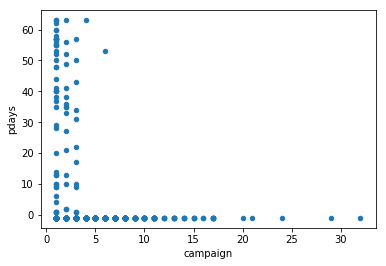

In [9]:
dfaux = df[(df['pdays'] < 64) & (df['y'] == 'yes')]
dfaux[['campaign', 'pdays']].plot.scatter(x='campaign', y='pdays')
dfaux[['campaign', 'pdays']].corr()

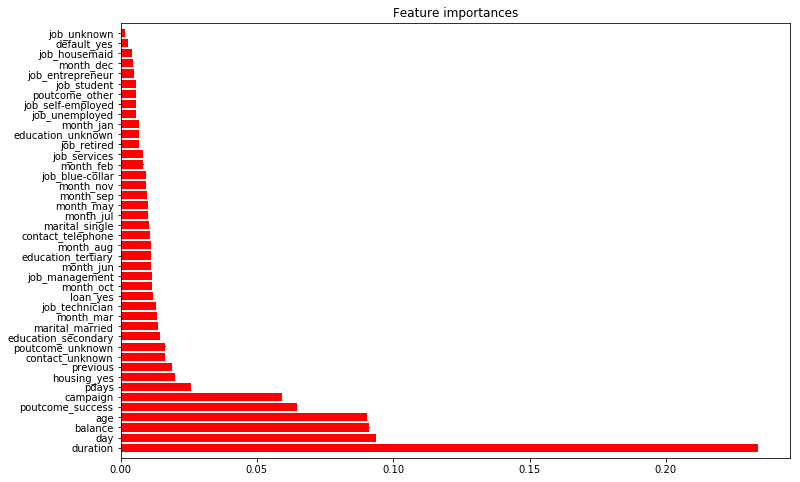

In [10]:
feature_importances(dfn.drop('y_yes', axis = 1), dfn['y_yes'])

# 5-Qual o fator determinante para que o banco exija um seguro de crédito?
R. Analisando a importância das variáveis através da entropia na RadomForest, a variável de maior importância para um cliente ter 'default' é o 'balance'. Avaliando a proporção do 'balance' com o 'default' é notável que os usuários que apresentam 'default' tem um balanço inferior a 0, esses usuários apresentam um maior risco para cumprir as suas obrigações a pagar representando mais de 96% das pessoas, sendo um perfil que o banco pode exigir um seguro de crédito.

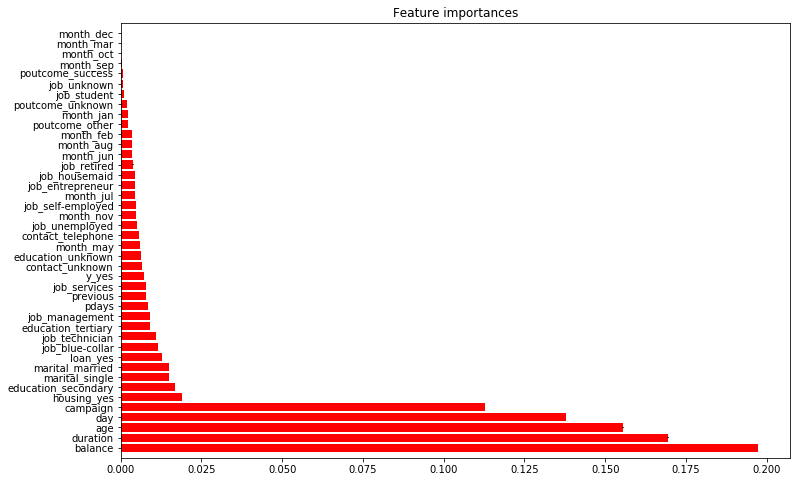

In [11]:
feature_importances(dfn.drop('default_yes', axis = 1), dfn['default_yes'])

In [12]:
binn = 2000
df['binned'] = df['balance'].apply(lambda x : (x // binn) * binn)
aux = df[['binned', 'default']].groupby(['binned', 'default']).size().unstack()
aux = aux['yes'] / aux['no'] * 100
aux[aux.index < 0].sum()

96.37943155568948

# 6-Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
R. Aanalisando a importância das variáveis através da RandomForest, as características do indivíduo 'age' e 'balance' são as tẽm maior importãncia para o empréstimo imobiliário. 

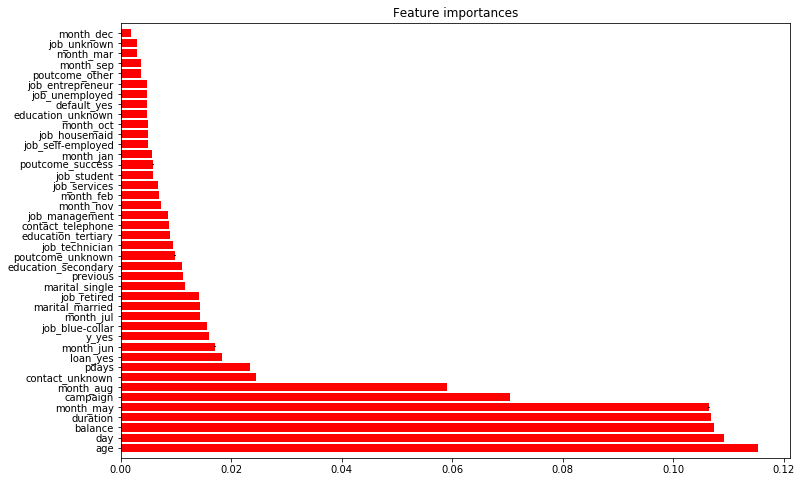

In [13]:
feature_importances(dfn.drop('housing_yes', axis = 1), dfn['housing_yes'])